# Convolutional neural network

## Parameters

In [25]:
import torch

sobel_filter = torch.tensor([
    [1.0, 0, -1.0],
    [2.0, 0, -2.0],
    [1.0, 0.0, -1.0]
])

bias = 0.0

## Random image (1, 1, 9, 9)

each value is within the range of 0-1

In [26]:
input_order = 9
image = torch.rand(1, 1, input_order, input_order)

print(image)

tensor([[[[0.4449, 0.3529, 0.7873, 0.7761, 0.3479, 0.3398, 0.6120, 0.8600,
           0.7665],
          [0.4357, 0.4507, 0.1545, 0.6421, 0.0565, 0.9582, 0.0230, 0.5175,
           0.0069],
          [0.4541, 0.9205, 0.8131, 0.8120, 0.4300, 0.9506, 0.3741, 0.3906,
           0.1054],
          [0.1206, 0.2501, 0.2852, 0.3743, 0.4141, 0.9342, 0.1547, 0.9438,
           0.3749],
          [0.0243, 0.3133, 0.4789, 0.4544, 0.9563, 0.8359, 0.1392, 0.9677,
           0.6882],
          [0.6370, 0.2799, 0.1286, 0.8236, 0.5257, 0.5285, 0.7111, 0.0142,
           0.6026],
          [0.5147, 0.7613, 0.8086, 0.8187, 0.5786, 0.3202, 0.3146, 0.5645,
           0.0438],
          [0.5280, 0.4398, 0.3023, 0.0577, 0.0523, 0.5352, 0.6788, 0.1528,
           0.6484],
          [0.1849, 0.4045, 0.4520, 0.0380, 0.8113, 0.5356, 0.1096, 0.6444,
           0.6319]]]])


## Convolution with the default parameters

The result has the dimension:
$$n_{new}={n-f}+1$$

- **n** - order of the input tensor
- **f** - order of the filter

In [27]:
import torch.nn as nn

cnn = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
cnn.state_dict()["weight"][0][0] = sobel_filter
cnn.state_dict()["bias"][0] = bias

z = cnn(image)
print(z)

tensor([[[[-0.1391, -0.6974,  1.0186, -0.3344, -0.1414,  0.9210,  0.1464],
          [-0.6016, -0.0986,  0.7353, -1.1531,  0.4047,  1.5510,  0.3335],
          [-1.1428, -0.2810, -0.3523, -1.6399,  1.3918,  0.4091, -0.7205],
          [-0.5654, -0.9501, -1.4810, -1.0278,  1.7082,  0.2412, -1.2095],
          [ 0.2683, -1.2858, -1.0417,  0.7073,  0.7103,  0.6525, -0.0610],
          [ 0.1463, -0.2763,  0.3129,  0.8146, -0.2839,  0.4081,  0.6806],
          [-0.1096,  1.0733,  0.3707, -0.9541, -0.2872,  0.4118, -0.1906]]]],
       grad_fn=<ConvolutionBackward0>)


## Convolution with the stride=2

stride=2 leads to:
- horizontal move - move 2 values right each time
- vertical mode - move 2 values down after finishing row

The result has the dimension:
$$n_{new}=\dfrac{n-f}{s}+1$$

- **n** - order of the input tensor
- **f** - order of the filter
- **s** - stride

In [28]:
cnn_stride2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2)
cnn_stride2.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2.state_dict()["bias"][0] = 0.0

z_stride2 = cnn_stride2(image)
print(z_stride2)

tensor([[[[-0.1391,  1.0186, -0.1414,  0.1464],
          [-1.1428, -0.3523,  1.3918, -0.7205],
          [ 0.2683, -1.0417,  0.7103, -0.0610],
          [-0.1096,  0.3707, -0.2872, -0.1906]]]],
       grad_fn=<ConvolutionBackward0>)


## Convolution with the stride=2 and padding=1

The result has the dimension:
$$n_{new}=\dfrac{n+2p-f}{s}+1$$

- **n** - order of the input tensor
- **f** - order of the filter
- **s** - stride
- **p** - padding

In [29]:
cnn_stride2_padding1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1)
cnn_stride2_padding1.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2_padding1.state_dict()["bias"][0] = 0.0

z_stride2_padding1 = cnn_stride2_padding1(image)
print(z_stride2_padding1)

tensor([[[[-1.1565, -1.0378,  0.5566, -0.5999,  2.2376],
          [-2.5419, -0.0986, -1.1531,  1.5510,  2.2425],
          [-1.1567, -0.9501, -1.0278,  0.2412,  2.8934],
          [-2.2424, -0.2763,  0.8146,  0.4081,  1.2960],
          [-1.2487,  1.1150, -1.4728,  0.1649,  1.4415]]]],
       grad_fn=<ConvolutionBackward0>)


## Convolution with the stride=2 and padding=same

To get the same input and output dimension:
$$n=\dfrac{n+2p-f}{s}+1$$

$$p = \frac{n(s - 1) + f - s}{2}$$

For **s=2** and **f=3**:
$$p = \frac{9(2 - 1) + 3 - 2}{2}=5$$

- **n** - order of the input tensor
- **f** - order of the filter
- **s** - stride
- **p** - padding

In [30]:
f = 3
s = 2
padding_same_stride2 = input_order * (s - 1) + f - s

cnn_stride2_padding_same = nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=f,
    stride=s,
    padding=padding_same_stride2
)
cnn_stride2_padding_same.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2_padding_same.state_dict()["bias"][0] = 0.0

z_stride2_padding_same = cnn_stride2_padding_same(image)
print(z_stride2_padding_same)

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000, -0.4449, -0.3423,  0.4394,
           -0.2642, -0.1545,  0.7665,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000, -1.7704, -0.1391,  1.0186,
           -0.1414,  0.1464,  0.8858,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000, -0.7195, -1.1428, -0.3523,
            1.3918, -0.7205,  1.

## Padding visualization


In [31]:
import torch.nn.functional as F

padded_image = F.pad(image, (1, 1, 1, 1))  # (left, right, top, bottom)
print(padded_image)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000],
          [0.0000, 0.4449, 0.3529, 0.7873, 0.7761, 0.3479, 0.3398, 0.6120,
           0.8600, 0.7665, 0.0000],
          [0.0000, 0.4357, 0.4507, 0.1545, 0.6421, 0.0565, 0.9582, 0.0230,
           0.5175, 0.0069, 0.0000],
          [0.0000, 0.4541, 0.9205, 0.8131, 0.8120, 0.4300, 0.9506, 0.3741,
           0.3906, 0.1054, 0.0000],
          [0.0000, 0.1206, 0.2501, 0.2852, 0.3743, 0.4141, 0.9342, 0.1547,
           0.9438, 0.3749, 0.0000],
          [0.0000, 0.0243, 0.3133, 0.4789, 0.4544, 0.9563, 0.8359, 0.1392,
           0.9677, 0.6882, 0.0000],
          [0.0000, 0.6370, 0.2799, 0.1286, 0.8236, 0.5257, 0.5285, 0.7111,
           0.0142, 0.6026, 0.0000],
          [0.0000, 0.5147, 0.7613, 0.8086, 0.8187, 0.5786, 0.3202, 0.3146,
           0.5645, 0.0438, 0.0000],
          [0.0000, 0.5280, 0.4398, 0.3023, 0.0577, 0.0523, 0.5352, 0.6788,
           0.1528, 0.6484, 0.0000],
 

## Visualization

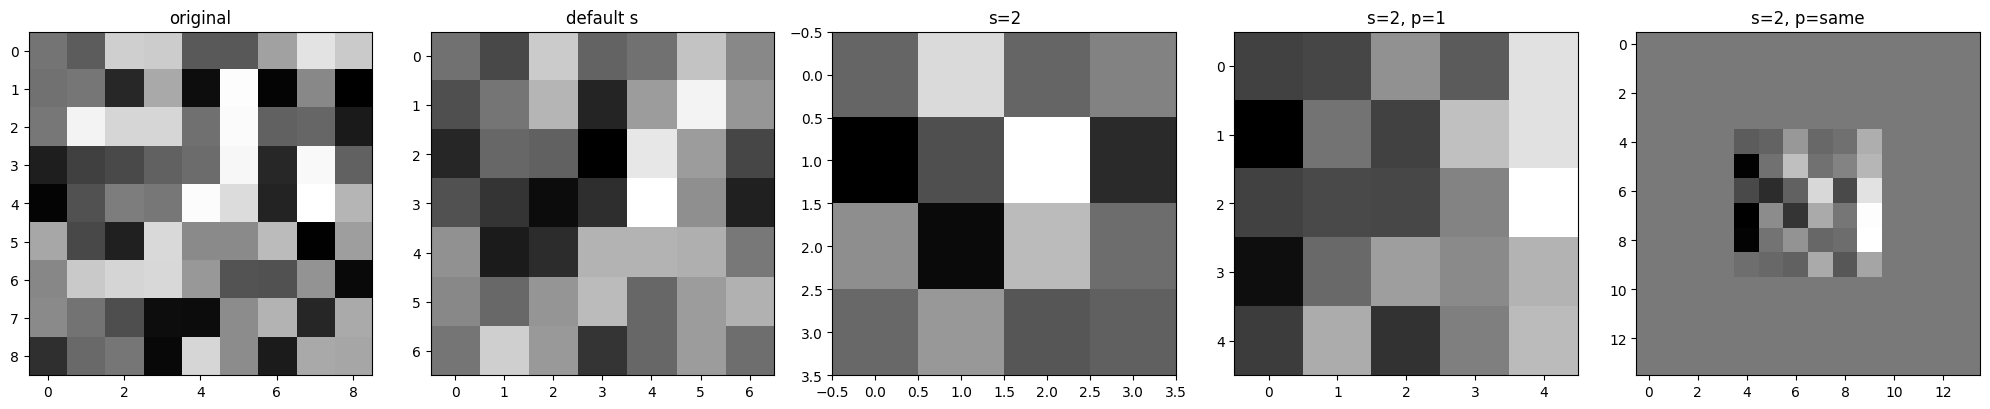

In [32]:
from matplotlib import pyplot as plt

images = [image, z, z_stride2, z_stride2_padding1, z_stride2_padding_same]
labels = ["original", "default s", "s=2", "s=2, p=1", "s=2, p=same"]

n = len(images)
fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))

for ax, i, l in zip(axes, images, labels):
    img_np = i.squeeze().detach().numpy()
    ax.imshow(img_np, cmap="gray")
    ax.set_title(l)

plt.tight_layout()
plt.show()